<a href="https://colab.research.google.com/github/dilek-gokalp/dilek-gokalp/blob/main/user_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/social_media_behavior_dataset (1).csv")
df["Date"] = pd.to_datetime(df["Date"])
daily_likes_shares = df.groupby("Date")[["Likes", "Shares"]].mean()
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)
daily_posts = df.groupby("Date").size()
print(daily_posts)

Date            datetime64[ns]
Platform                object
Hashtag                 object
Post Content            object
Sentiment               object
Likes                    int64
Shares                   int64
dtype: object
Date
2024-01-02    3
2024-01-03    3
2024-01-04    3
2024-01-05    1
2024-01-06    2
             ..
2024-10-23    1
2024-10-24    1
2024-10-25    3
2024-10-26    2
2024-10-27    1
Length: 260, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Checking for Missing Values
missing_values = df.isnull().sum()

# Checking for Duplicates
duplicate_rows = df.duplicated().sum()

# Basic Statistics for Likes and Shares columns
likes_shares_stats = df[['Likes', 'Shares']].describe()

missing_values, duplicate_rows, likes_shares_stats
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nLikes and Shares Statistics:\n", likes_shares_stats)
print(df[['Likes', 'Shares']].describe())



Missing Values:
 Date            0
Platform        0
Hashtag         0
Post Content    0
Sentiment       0
Likes           0
Shares          0
dtype: int64

Duplicate Rows: 0

Likes and Shares Statistics:
             Likes      Shares
count  600.000000  600.000000
mean   234.810000   95.936667
std    144.596811   60.512221
min      0.000000    0.000000
25%    109.750000   42.000000
50%    226.500000   94.000000
75%    360.000000  151.000000
max    500.000000  200.000000
            Likes      Shares
count  600.000000  600.000000
mean   234.810000   95.936667
std    144.596811   60.512221
min      0.000000    0.000000
25%    109.750000   42.000000
50%    226.500000   94.000000
75%    360.000000  151.000000
max    500.000000  200.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset here before using df
df = pd.read_csv("/content/social_media_behavior_dataset (1).csv")
df["Date"] = pd.to_datetime(df["Date"])
daily_likes_shares = df.groupby("Date")[["Likes", "Shares"]].mean()
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)
daily_posts = df.groupby("Date").size()
print(daily_posts)

# Checking for Missing Values
missing_values = df.isnull().sum()

# Checking for Duplicates
duplicate_rows = df.duplicated().sum()

# Basic Statistics for Likes and Shares columns
likes_shares_stats = df[['Likes', 'Shares']].describe()

missing_values, duplicate_rows, likes_shares_stats
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nLikes and Shares Statistics:\n", likes_shares_stats)
print(df[['Likes', 'Shares']].describe())

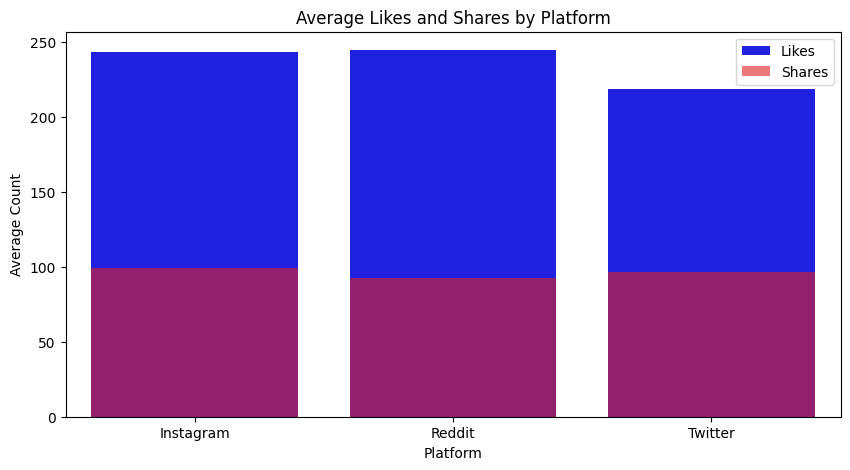

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average likes and shares by platform
platform_stats = df.groupby("Platform")[["Likes", "Shares"]].mean().reset_index()

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x="Platform", y="Likes", data=platform_stats, color="blue", label="Likes")
sns.barplot(x="Platform", y="Shares", data=platform_stats, color="red", alpha=0.6, label="Shares")

plt.title("Average Likes and Shares by Platform") # Updated title
plt.ylabel("Average Count")
plt.xlabel("Platform")
plt.legend()
plt.show()

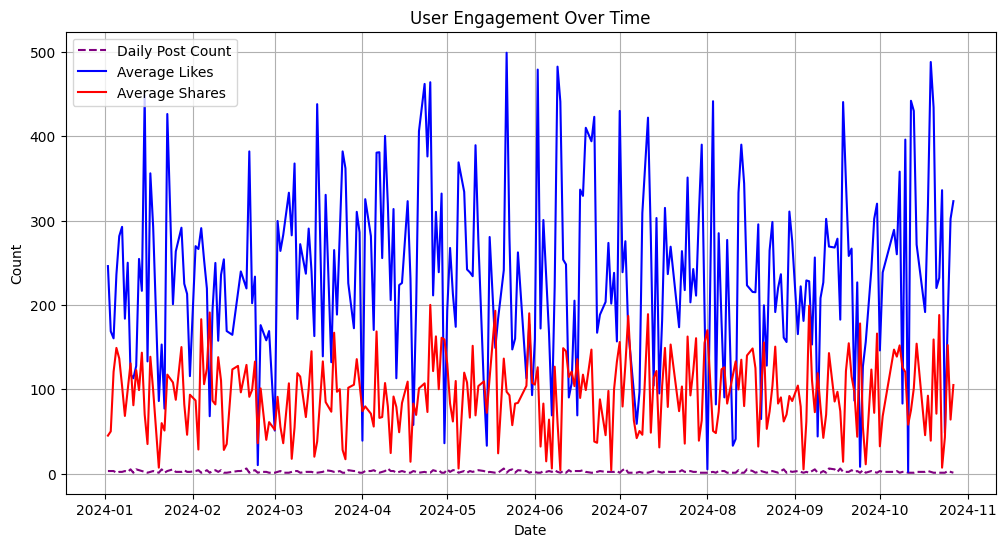

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_posts.index, daily_posts, label="Daily Post Count", color="purple", linestyle="dashed")
plt.plot(daily_likes_shares.index, daily_likes_shares["Likes"], label="Average Likes", color="blue")
plt.plot(daily_likes_shares.index, daily_likes_shares["Shares"], label="Average Shares", color="red")

plt.title("User Engagement Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/social_media_behavior_dataset (1).csv")

# Select relevant features for clustering
features = df[['Likes', 'Shares']]

# Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Check cluster assignments
print(df[['Likes', 'Shares', 'KMeans_Cluster', 'DBSCAN_Cluster']].head())

# Save the clustered data
df.to_csv("clustered_data.csv", index=False)


   Likes  Shares  KMeans_Cluster  DBSCAN_Cluster
0    254      28               0               0
1    466      51               0               0
2    169      61               2               0
3     89     140               1               0
4    191     191               1               0


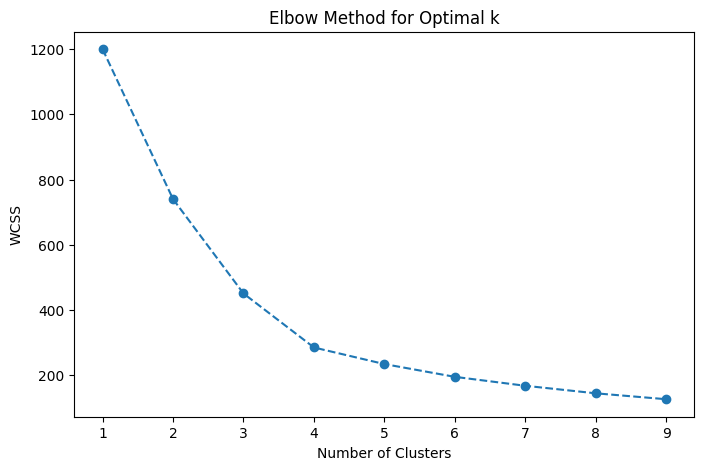

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Likes', 'Shares']])

# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()




In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


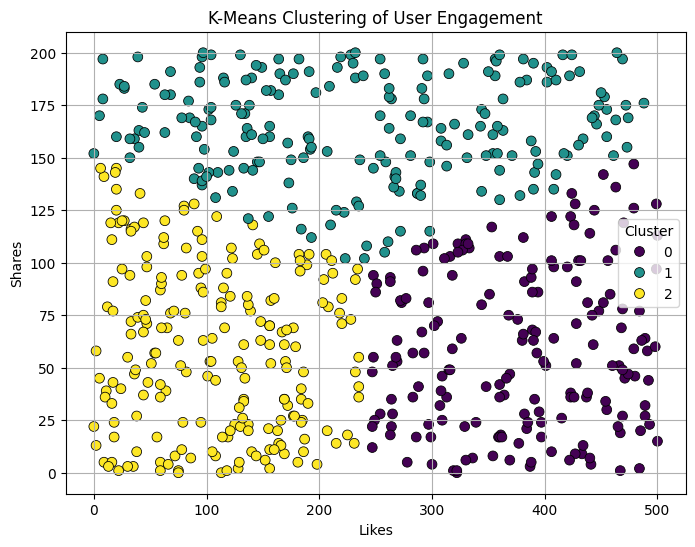

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Likes'], y=df['Shares'], hue=df['KMeans_Cluster'], palette='viridis', s=50, edgecolor='k')
plt.title("K-Means Clustering of User Engagement")
plt.xlabel("Likes")
plt.ylabel("Shares")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


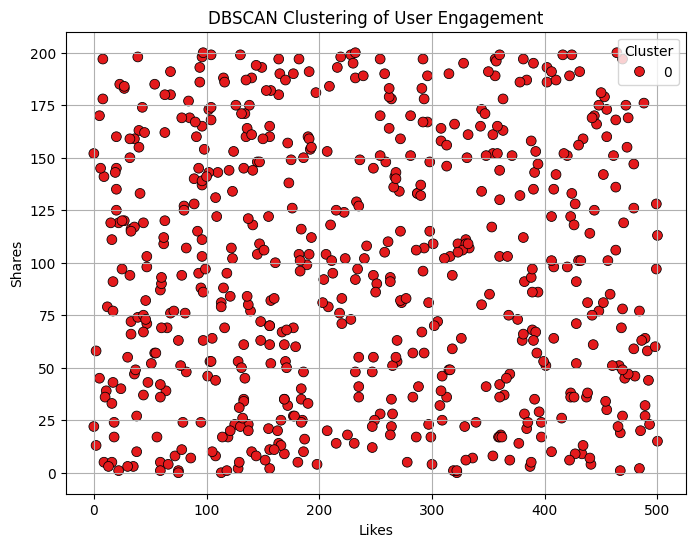

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Likes'], y=df['Shares'], hue=df['DBSCAN_Cluster'], palette='Set1', s=50, edgecolor='k')
plt.title("DBSCAN Clustering of User Engagement")
plt.xlabel("Likes")
plt.ylabel("Shares")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
